In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [ ]:
Q2. Describe your fraud detection model in elaboration


Within the provided transaction types, a potential for fraud becomes evident primarily within the Transfer
and Cash_out categories. In Transfer transactions, funds are directed to either legitimate customers or fraudsters,
while in Cash_out transactions, money is dispatched to merchants who then provide cash to customers or fraudsters.
Notably, the following statistics highlight that the count of fraudulent Transfers aligns with the count of fraudulent
Cash_out transactions.

In [7]:
legit_transactions = len(data[data.isFraud == 0])
fraud_transactions = len(data[data.isFraud == 1])

print("\n No. of legit transactions: ", legit_transactions)
print(" No. of fraud transactions: ", fraud_transactions)

l_percent = (legit_transactions/(legit_transactions+fraud_transactions)) * 100
f_percent = (fraud_transactions/(legit_transactions+fraud_transactions)) * 100

print("\n Percentage of Legit Transactions: {:.2f} %".format(l_percent))
print(" Percentage of Fraud Transactions: {:.2f} %".format(f_percent))

print('\n Types of fraudulent data {}'.format(\
list(data.loc[data.isFraud == 1].type.drop_duplicates().values))) #To check which type of transactions might result in fraud                                    



dataFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dataFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('\n No. fraudulent TRANSFERs = {}'.format(len(dataFraudTransfer)))

print (' The number of fraudulent CASH_OUTs = {}'.format(len(dataFraudCashout))) 


 No. of legit transactions:  6354407
 No. of fraud transactions:  8213

 Percentage of Legit Transactions: 99.87 %
 Percentage of Fraud Transactions: 0.13 %

 Types of fraudulent data ['TRANSFER', 'CASH_OUT']

 No. fraudulent TRANSFERs = 4097
 The number of fraudulent CASH_OUTs = 4116


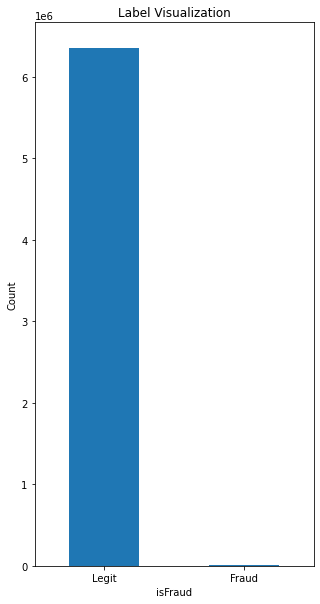

In [8]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]

count = data.value_counts(data['isFraud'], sort = True)
count.plot(kind = "bar", rot = 0)

plt.title("Label Visualization")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


The dataset provided exhibits a pronounced imbalance. Elements within the nameDest column commencing with the 
letter 'M' signify merchant entities.

In [9]:
Merchant_Details = data[data['nameDest'].str.contains('M')]
Merchant_Details.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


<AxesSubplot:>

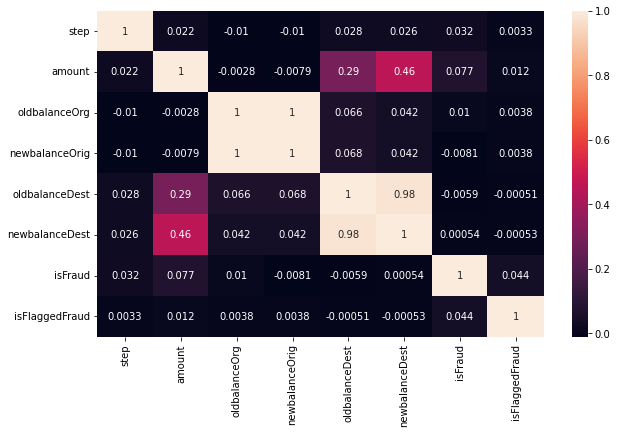

In [10]:
corr = data.corr()

plt.figure(figsize=(10,6))

sns.heatmap(corr,annot=True)

In [11]:
df = data.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
Q1. Data cleaning including missing values, outliers and multi-collinearity. 

Three attributes are of the object datatype. We need to Label Encode them inorder to check for multicollinearity

In [13]:
objects = df.select_dtypes(include = "object").columns
print(objects)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder

le  = LabelEncoder()

for i in objects: 
    df[i] = le.fit_transform(df[i].astype(str))
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


Multicollinearity

When features exhibit significant correlation with each other, it indicates the presence of multicollinearity
or intercorrelation issue.
Multicollinearity can be identified by computing the Variance Inflation Factor (VIF), and a general guideline
is to keep it below 10.
The formula for VIF is VIF = 1/(1-R^2).

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(data):
    
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calculate_VIF(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


The columns oldbalanceOrg, newbalanceOrg, oldbalanceDest, and newbalanceDest exhibit notably high VIF values,
indicating strong correlation among them. Additionally, there is a connection between nameDest and nameOrig.
To address this, we opt to eliminate specific columns and merge the remaining ones.

In [17]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)


df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calculate_VIF(df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<AxesSubplot:>

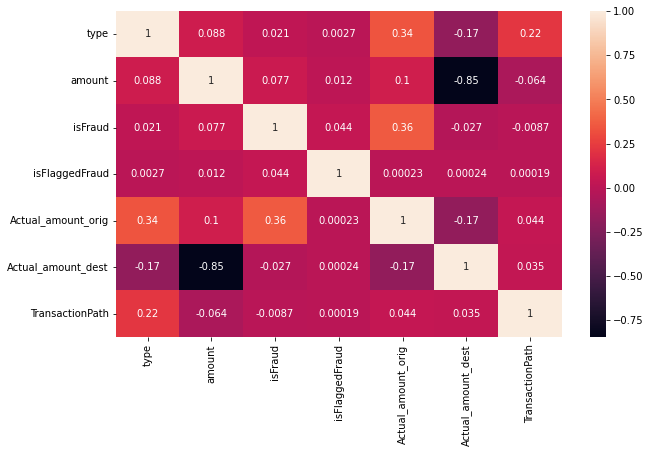

In [18]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

Q3. How did you select variables to be included in the model?

Utilize the correlation heatmap and VIF data to identify strong connections between attributes. Subsequently, eliminate those traits that demonstrate weaker correlation with the isFraud attribute.

In [19]:
df.head()

,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
0,3,9839.64,0,0,9839.64,0.0,2419963.0
1,3,1864.28,0,0,1864.28,0.0,3922922.0
2,4,181.00,1,0,181.00,0.0,1441841.0
3,1,181.00,1,0,181.00,21182.0,6219958.0
4,3,11668.14,0,0,11668.14,0.0,4274900.0


Normalizing Amount

 The process of transforming numerical variables within a dataset to a standardized scale.
    The goal of normalization is to ensure that the variables are on a similar scale, which 
    can be particularly important when working with algorithms that are sensitive to the magnitude 
    of features.
    
    This is done by subtracting the minimum value from each data point and then dividing by the range
    (difference between maximum and minimum values) of the variable. As a result, the values of the
    variable are proportionally adjusted to lie within a specific range, making comparisons and analyses
    more accurate.

In [20]:

from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
df['Normal_Amount'] = scaler.fit_transform(df["amount"].values.reshape(-1,1))

df.drop(["amount"], inplace=True, axis=1)

X = df.drop(["isFraud"],axis = 1) #independent variables
y = df["isFraud"] #dependent variable

In [22]:

df.head()

,type,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,Normal_Amount
0,3,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,1,0,181.00,0.0,1441841.0,-0.297555
3,1,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,0,11668.14,0.0,4274900.0,-0.278532


TRAIN - TEST - SPLIT 

In [23]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size = 0.3, random_state = 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


MODEL TRAINING 

In [24]:
import itertools
from collections import Counter
import sklearn.metrics as metrics

Q4. Demonstrate the performance of the model by using best set of tools. 

*****BELOW*****

Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

y_pred_dt = decision_tree.predict(X_test)
dt_score = decision_tree.score(X_test, y_test) * 100

Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)

y_pred_rf = random_forest.predict(X_test)
rf_score = random_forest.score(X_test, y_test)*100

Evaluation of Decision tree and Random Forest 

In [27]:
#Scores of our classifiers 

print("Decision Tree: ", dt_score)
print("Random Forest: ", rf_score)

Decision Tree:  99.92345920391286
Random Forest:  99.95882199471286


Confusion matrix

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


Confusion matrix decision tree

In [29]:
print("Confusion matrix for Decision Tree")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

Confusion matrix for Decision Tree
True Positives: 1718
False Positives: 744
True Negatives: 1905607
False Negatives: 717


Confusion matrix random forest 

In [30]:
print("Confusion matrix for Random Forest")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

Confusion matrix for Random Forest
True Positives: 1717
False Positives: 68
True Negatives: 1906283
False Negatives: 718



The sequence of actions outlined earlier unmistakably demonstrates that Random Forest outperforms Decision 
Trees with respect to both the False Positive rate and the True Negative rate. Specifically, the False
Positive rate of the Decision Tree is notably higher than that of the Random Forest,
while the True Negative rate of the Decision Tree is comparably lower than that of the Random Forest.

In [31]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[1905607     744]
 [    717    1718]]


In [32]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906283      68]
 [    718    1717]]


Classification 

In [33]:
class_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(class_rep_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [34]:
class_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(class_rep_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.71      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



Visualising confusion matrix - (Decision Tree)

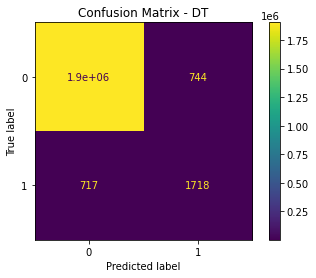

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

Visualising confusion matrix (Random Forest)

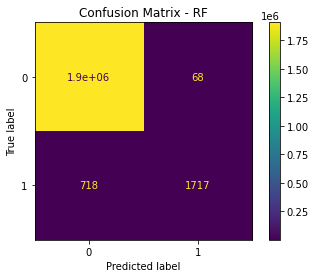

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

Area Under the Receiver Operating Characteristic Curve (AUC ROC) for the Decision Tree model.

Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for all possible thresholds in the classification process.

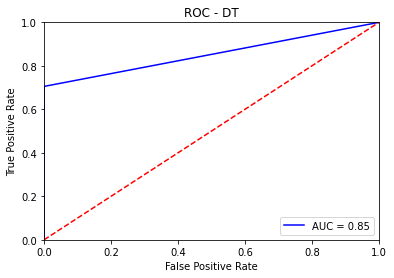

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Area Under the Curve of the Receiver Operating Characteristic (AUC ROC) for the Random Forest model.


Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for all potential thresholds in the classification procedure.

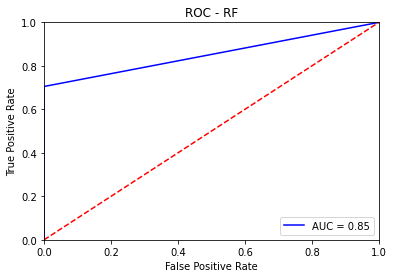

In [38]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SUMMARY 

In summary, our analysis reveals that Random Forest boasts higher precision, while the accuracy remains equal for both
the Random Forest and Decision Tree models. Precision holds paramount importance in a fraud detection model due to the
objective of identifying fraudulent transactions without misclassifying legitimate ones. Failing to satisfy either condition
could lead to wrongful accusations while allowing actual offenders to go undetected. This rationale underscores the preference
for Random Forest and Decision Tree algorithms over alternative approaches.

Furthermore, the presence of a highly imbalanced dataset (with a ratio of Legitimate to Fraudulent instances at 99.87:0.13) 
further justifies the adoption of this model. Given that decision trees render binary decisions, the Random Forest approach
generates multiple decision trees, enhancing the models ability to interpret input data with relative simplicity, albeit at
the cost of computation time.

While alternatives like XGBoost, Bagging, Artificial Neural Networks (ANN), and Logistic Regression might offer commendable
accuracy, their precision and recall values are anticipated to lag behind in this context.





Q5. What are the key factors that predict fraudulent customer?

Is the origin of the request from a secure source?
Does the requesting organizations name have a legitimate reputation?
Analyzing the transaction history of the vendor.


Q6.Do these factors make sense? If yes, How? If not, How not? 
 
These factors make sense because they collectively provide a multi-layered approach to assessing the authenticity of transactions. By evaluating the security of the source, the reputation of the requesting organization, and the past behavior of vendors, a more comprehensive understanding of the transaction's legitimacy can be gained. This approach helps in detecting potentially fraudulent activities by flagging transactions that deviate from established patterns or come from untrusted sources. 




Q7.What kind of prevention should be adopted while company update its infrastructure?

Exclusively utilize apps that are verified and intelligent.
Access websites that have implemented robust safeguards.
Employ secure internet connections, such as through the use of a VPN.
Regularly update the security features on both laptops and mobile devices.
Refrain from responding to unsanctioned calls, SMS messages, or emails.
Promptly contact your bank if there are suspicions of security breaches or fraud.


Q8. Assuming these actions have been implemented, how would you determine if they work?

Scrutinize electronic statements provided by the bank.
Encourage customers to actively monitor their account activities.
Maintain a comprehensive record of all payment transactions.